In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix , classification_report
from xgboost import XGBClassifier, plot_importance, plot_tree, to_graphviz
from scikitplot.metrics import plot_roc, plot_confusion_matrix as plot_cm
from graphviz import Source
from imblearn.over_sampling import SMOTE
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/banksim.csv
/kaggle/input/fraud-detection/banksim_adj.csv
/kaggle/input/fraud-detection/creditcard_sampledata_2.csv
/kaggle/input/fraud-detection/enron_emails_clean.csv


### Supervised Learning: Classification

In [2]:
df_credit = pd.read_csv('/kaggle/input/fraud-detection/creditcard_sampledata_2.csv').drop(['Unnamed: 0'], axis=1)
df_credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,-0.334597,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,-0.029903,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,1.465259,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,-0.165442,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,0.484216,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


In [3]:
df_credit.Class.value_counts()

0    7000
1     300
Name: Class, dtype: int64

In [4]:
df_credit.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,...,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000
mean,-0.193825,0.159880,-0.278411,0.193200,-0.128358,-0.048911,-0.202722,0.029468,-0.099865,-0.219260,...,0.033059,-0.003541,0.004062,-0.001630,-0.001130,0.011666,0.009332,0.005830,90.372956,0.041096
std,2.521772,1.970007,2.488454,1.746604,1.826802,1.371383,2.175403,1.764826,1.307587,1.863682,...,1.071380,0.778235,0.654663,0.597398,0.531629,0.484641,0.464333,0.330659,289.206749,0.198526
min,-31.972536,-42.172688,-31.103685,-5.047408,-28.815577,-8.389238,-43.557242,-41.044261,-13.320155,-24.588262,...,-22.797604,-8.887017,-17.530682,-2.822684,-4.547278,-1.577118,-7.263482,-3.916662,0.000000,0.000000
25%,-0.995027,-0.550039,-1.029977,-0.796602,-0.737594,-0.801558,-0.602338,-0.199438,-0.708590,-0.580755,...,-0.232682,-0.543785,-0.165239,-0.356176,-0.320517,-0.317820,-0.070511,-0.054776,5.000000,0.000000
50%,-0.081147,0.103165,0.112765,0.050026,-0.056608,-0.300839,0.031776,0.033797,-0.086823,-0.100473,...,-0.020227,0.007343,-0.012333,0.038141,0.013887,-0.035643,0.006109,0.012170,21.855000,0.000000
75%,1.291141,0.884756,1.012824,0.871857,0.616391,0.380007,0.558040,0.352100,0.583610,0.412193,...,0.200228,0.528939,0.146370,0.428241,0.351934,0.270810,0.106617,0.083614,76.000000,0.000000
max,2.446505,22.057729,3.757300,12.132323,12.791416,21.190194,26.249717,20.007208,8.141560,12.901627,...,27.202839,8.316275,13.218751,3.437028,3.590787,3.116200,5.058448,15.124103,12910.930000,1.000000


In [25]:
def evaluate(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1-score': f1_score(y_true, y_pred, average='weighted'),
        'roc_auc': roc_auc_score(y_true, y_pred)
    }  

y = df_credit.Class
X = df_credit.drop(['Class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate(y_test, y_pred)

{'accuracy': 0.9691780821917808,
 'precision': 0.9763625406548516,
 'recall': 0.9691780821917808,
 'f1-score': 0.971811299464219,
 'roc_auc': 0.8998074301934451}

100%|██████████| 7/7 [00:21<00:00,  3.07s/it]


[{'accuracy': 0.9684931506849315, 'precision': 0.975818145479721, 'recall': 0.9684931506849315, 'f1-score': 0.9711509022133116, 'roc_auc': 0.9038095238095238, 'model': 'KNN'}, {'accuracy': 0.9732876712328767, 'precision': 0.9758646358262398, 'recall': 0.9732876712328767, 'f1-score': 0.9743565036258013, 'roc_auc': 0.8744047619047618, 'model': 'NB'}, {'accuracy': 0.9753424657534246, 'precision': 0.9775288966478479, 'recall': 0.9753424657534246, 'f1-score': 0.976246643325742, 'roc_auc': 0.8834523809523809, 'model': 'DTC'}, {'accuracy': 0.9794520547945206, 'precision': 0.983191995839935, 'recall': 0.9794520547945206, 'f1-score': 0.9807256638759592, 'roc_auc': 0.9414285714285714, 'model': 'ADB'}, {'accuracy': 0.9897260273972602, 'precision': 0.9894879225827979, 'recall': 0.9897260273972602, 'f1-score': 0.9892277179809459, 'roc_auc': 0.8909523809523809, 'model': 'RFC'}, {'accuracy': 0.9876712328767123, 'precision': 0.9874920570316915, 'recall': 0.9876712328767123, 'f1-score': 0.9875711517876

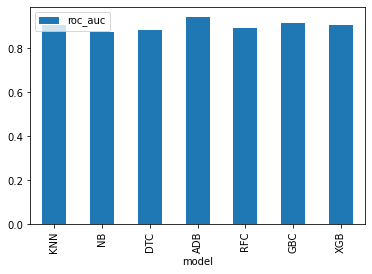

In [28]:
### Model Selection 

def balance_train_test(df):
    y = df.Class
    X = df.drop(['Class'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=0)
    X_train, y_train = SMOTE(k_neighbors=3).fit_sample(X_train, y_train)
    return X_train, X_test, y_train, y_test

def model_selection(df, models):
    X_train, X_test, y_train, y_test = balance_train_test(df)
    results = []
    for name, model in tqdm(models.items()):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        result = evaluate(y_test, y_pred)
        result['model'] = name
        results.append(result)
        
    model_compare = pd.DataFrame(data=results)
    model_compare.plot.bar(x='model', y='roc_auc')
    print(results)

models = {'KNN': KNeighborsClassifier(), 'NB': GaussianNB(),'DTC': DecisionTreeClassifier(), 'ADB': AdaBoostClassifier(),
      'RFC': RandomForestClassifier(), 'GBC': GradientBoostingClassifier(), 'XGB': XGBClassifier()}
model_selection(df_credit, models)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  9.0min finished


{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}


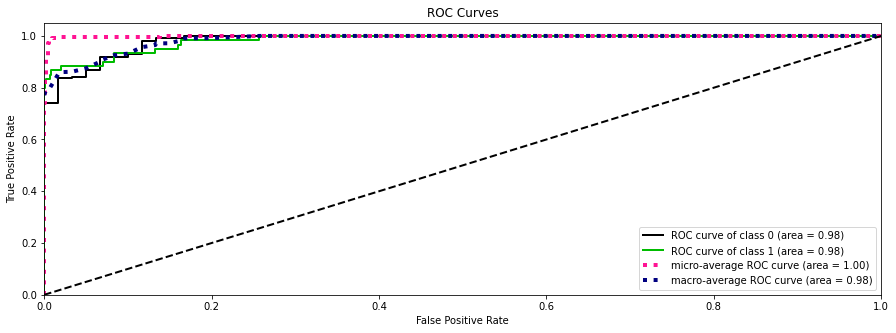

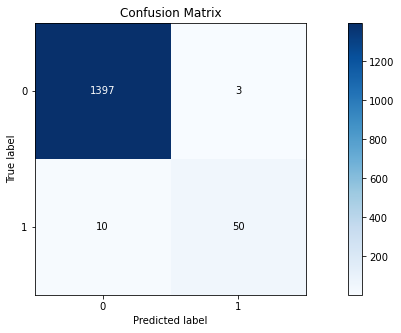

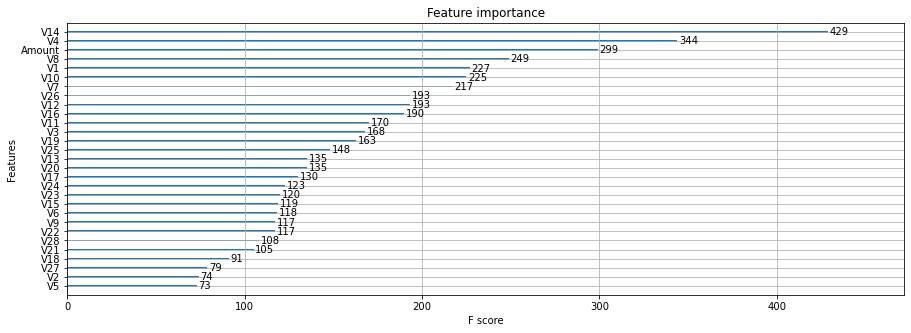

In [31]:
### Model Optimization

def optimize_classifier(df, params, model):
    # oversample on imbalanced class in training set
    X_train, X_test, y_train, y_test = balance_train_test(df)
    grid = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    
    # train model with best params
    model = XGBClassifier(**grid.best_params_)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    
    # visualize results
    rcParams['figure.figsize'] = 15,5
    plot_roc(y_test, y_proba)
    plot_cm(y_test, y_pred)
    plot_importance(model)
    
    return model
    
params = {'max_depth': [5, 10, 50], 'n_estimators': [100, 200, 300],'learning_rate': [0.01, 0.03, 0.05],}
model = optimize_classifier(df_credit, params, models['XGB'])

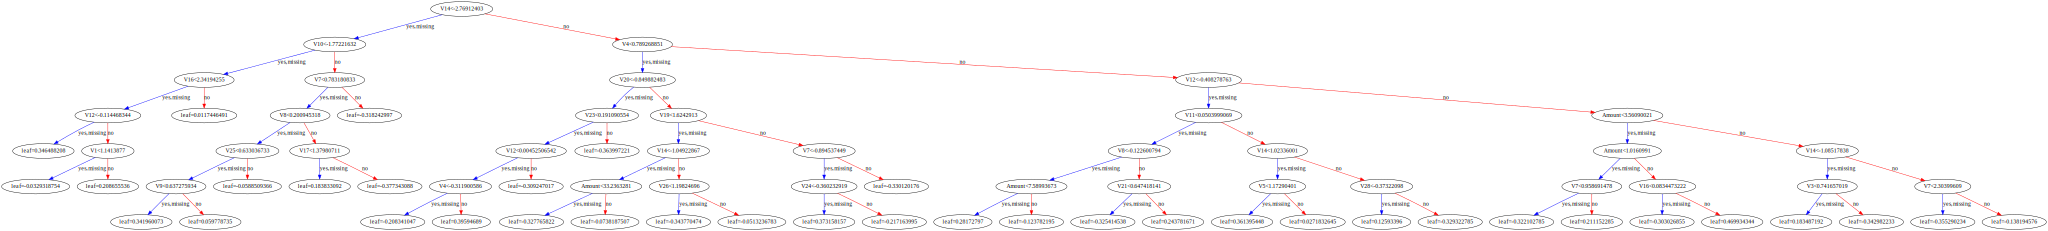

In [33]:
# visualize the decision tree fraud rules
to_graphviz(models['XGB'], num_trees=4)

### Unsupervised Learning: Kmeans, DB-Scan, TSNE

We start off by trying to identify fradulent transactions using kmeans clustering. Here are the steps as follows:

1) Reduce the dimensionality of our features by getting the first n components using PCA

2) Find the optimal number of clusters(k) using the elbow-silhoutte method

3) Make predictions by predicting outliers that vary above the 95th percentile from the cluster centroids


In [71]:
df_bank = pd.read_csv('/kaggle/input/fraud-detection/banksim_adj.csv')
fraud = df_bank.fraud
df_bank = df_bank.drop(['fraud', 'Unnamed: 0'], axis=1)
df_bank

,age,amount,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
0,3,49.7100,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4,39.2900,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,18.7600,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,13.9500,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,49.8700,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184,5,236.1474,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7185,5,139.6000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7186,1,236.1474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7187,1,236.1474,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


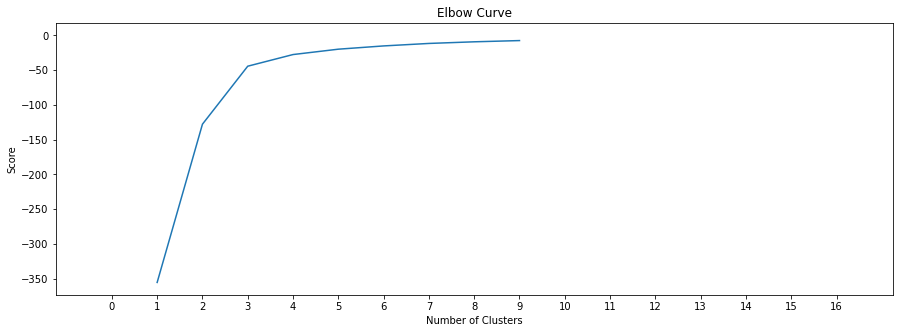

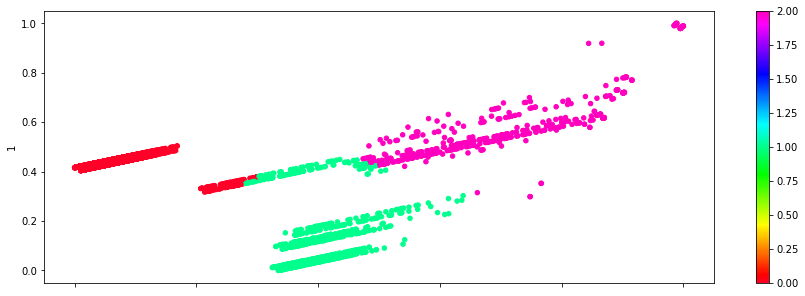

In [66]:
def reduce_dimension(df):
    # Standardize the data to have a mean of ~0 and a variance of 1
    X_std = StandardScaler().fit_transform(df)
    pca = PCA(n_components=len(df.columns))
    principalComponents = pca.fit_transform(X_std)
    
    # Plot the explained variances
    features = range(pca.n_components_)
    plt.bar(features, pca.explained_variance_ratio_, color='black')
    plt.xlabel('PCA features')
    plt.ylabel('variance %')
    plt.xticks(features)

    return pd.DataFrame(principalComponents)

def find_k(df, n_components):
    df = df.iloc[:,:n_components]
    df_scaled = MinMaxScaler().fit_transform(df)
    models = [KMeans(n_clusters=i) for i in range(1, 10)]
    score = [models[i].fit(df_scaled).score(df_scaled) for i in range(len(models))]

    plt.plot(range(1, 10), score) 
    plt.xlabel('Number of Clusters') 
    plt.ylabel('Score') 
    plt.title('Elbow Curve') 
    plt.show()
    return pd.DataFrame(df_scaled, columns=df.columns)
    
def kmeans_predict(df, k):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df)
    df.plot.scatter(0, 1, c=kmeans.labels_, colormap='gist_rainbow')
    
    # Create predictions based on distance
    X_clusters = kmeans.predict(df)
    X_clusters_centers = kmeans.cluster_centers_
    dist = [np.linalg.norm(x - y) for x, y in zip(df.values, X_clusters_centers[X_clusters])]
    km_y_pred = np.array(dist) 
    km_y_pred[dist >= np.percentile(dist, 95)] = 1 
    km_y_pred[dist < np.percentile(dist, 95)] = 0
    return km_y_pred

df_pca = reduce_dimension(df_bank)
df_bank_scaled = find_k(df_pca, n_components=2)
pred = kmeans_predict(df_bank_scaled, k=3)

Here we can see that our algorithm flagged those transactions that were outliers on the top right, achieving pretty good precision, recall and f1-scores!

In [72]:
evaluate(fraud, pred)

{'accuracy': 0.9482542773682014,
 'precision': 0.9643536925975373,
 'recall': 0.9482542773682014,
 'f1-score': 0.9553469390171107,
 'roc_auc': 0.7159700958649305}

### DB-Scan

Estimated number of clusters: 17


Text(0.5, 1.0, 'DBSCAN')

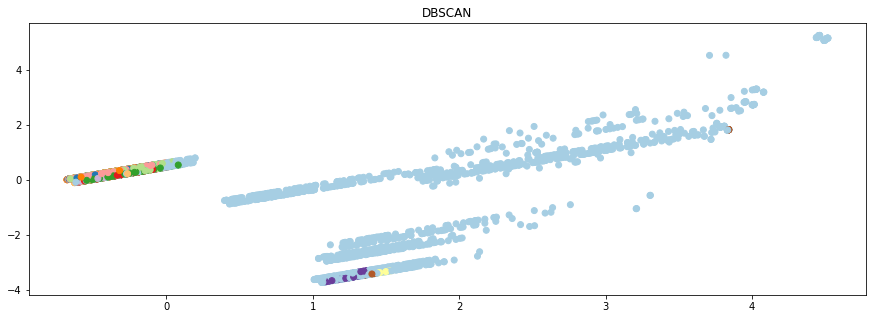

In [86]:
X = StandardScaler().fit_transform(df_pca)
db = DBSCAN(eps=0.2, min_samples=10, n_jobs=-1).fit(X)
pred_labels = db.labels_
n_clusters_ = len(set(pred_labels)) - (1 if -1 in pred_labels else 0) # Count the total number of clusters
print('Estimated number of clusters: %d' % n_clusters_)
y_pred = db.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7189 samples in 0.015s...
[t-SNE] Computed neighbors for 7189 samples in 0.350s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7189
[t-SNE] Computed conditional probabilities for sample 2000 / 7189
[t-SNE] Computed conditional probabilities for sample 3000 / 7189
[t-SNE] Computed conditional probabilities for sample 4000 / 7189
[t-SNE] Computed conditional probabilities for sample 5000 / 7189
[t-SNE] Computed conditional probabilities for sample 6000 / 7189
[t-SNE] Computed conditional probabilities for sample 7000 / 7189
[t-SNE] Computed conditional probabilities for sample 7189 / 7189
[t-SNE] Mean sigma: 0.021164
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.331676
[t-SNE] KL divergence after 5000 iterations: 0.141230


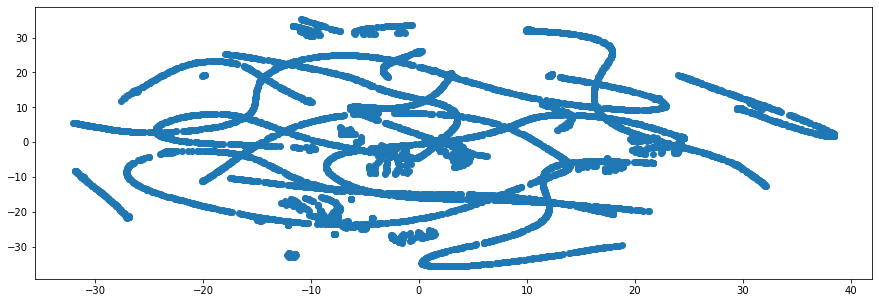

In [87]:
tsne = TSNE(n_components=3, verbose=1, perplexity=30, n_iter=5000)
tsne_results = tsne.fit_transform(df_pca)
plt.scatter(tsne_results[:, 0],tsne_results[:, 1])
plt.show()

### NLP Techniques

1. Word Search
2. Topic Analysis

In [129]:
df_emails = pd.read_csv('/kaggle/input/fraud-detection/enron_emails_clean.csv')
df_emails = df_emails.dropna()
print(len(df_emails))
df_emails.iloc[2]

2086


Message-ID       <26118676.1075862176383.JavaMail.evans@thyme>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [123]:
### Most basic way is to simply filter the email content by certain phrases

suspicious_phrases = ['police', 'money laundering']
df_sus = df_emails.loc[df_emails.content.str.contains('|'.join(suspicious_phrases), na=False)]
print(len(df_sus))
print(df_sus.content.iloc[2])

7
Dear Mike,

Thanks for your insight.  In the past few months we have established a 
detailed approach to doorstep which includes interfacing with BRM.  Through 
my calls the past week, I've been trying to update you so we can determine 
how best to coordinate the Enron Europe work, as well as get an understanding 
of what resources you can supply for this global initiative.

My next step is to contact some of the people on the list you gave me to 
determine their skill set and what locations/commodities they'd be best to 
work on.

I'll send you an updated schedule once I've finalized this.

Thanks

Shona





Mike Jordan@ECT
10/11/2000 09:37 AM
To: Shawn Kilchrist/NA/Enron@Enron, Shona Wilson/NA/Enron@Enron
cc: Fernley Dyson/LON/ECT@ECT, Sally Beck/HOU/ECT@ECT 

Subject: Transparently controlling the wholesale trading businesses - an 
internal approach to internal audit

Shawn / Shona

We have talked round this issue for some time so I thought I would try to 
take a brief stab at do

### Topic Modelling

1. Clean text by removing stopwords, punctuations, lemmatize and stemming
2. Generate dictionary and bag of words model for each document
3. Fit LDA Model to identify topics
4. Visualize and identify suspicious topics

Topic Modelling

In [151]:
### More robust way would be to do topic modelling

from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

# Define word cleaning function
def clean(text):
    text = text.rstrip().lower()
    
    # Remove stopwords
    stop_free = " ".join([word for word in text.lower().split() if ((word not in stop) and (not word.isdigit()))])
    
    # Remove punctuations
    punc_free = ''.join(word for word in stop_free if word not in exclude)
    
    # Lemmatize all words
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())      
    
    # Stem words
    stemmed = " ".join(porter.stem(token) for token in normalized.split())
    
    return stemmed

# Define stopwords and punctuations to exclude
stop = set(stopwords.words('english'))
stop.update(("to","cc","subject","http","from","sent", "ect", "u", "fwd", "www", "com", "tr"))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
porter = PorterStemmer()
df_emails['cleaned'] = df_emails.clean_content.apply(lambda x: clean(x))
df_emails.cleaned.iloc[0][:500]


'investool advisori free digest trust invest advic unsubscrib free newslett pleas see issu fri sell stock gain month km row januari index confirm bull market aloy small cap advisor earn lbix compound return pine tree pcl undervalu high yield bank put custom first aso word sponsor top wall street watcher ben zack year year gain move best brightest wall street big money machin earn ben zack five year averag annual gain start outperform long term get zack latest stock buylist free day trial investoo'

In [152]:
import gensim
from gensim import corpora

# Generate the dictionary and bag of words corpus
text_clean = df_emails.cleaned.str.split(' ')
dictionary = corpora.Dictionary(text_clean)
corpus = [dictionary.doc2bow(text) for text in text_clean]

print(dictionary)
print(corpus[:1])

Dictionary(28371 unique tokens: ['account', 'accur', 'acquir', 'acr', 'address']...)
[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 6), (6, 1), (7, 2), (8, 4), (9, 1), (10, 1), (11, 3), (12, 2), (13, 1), (14, 5), (15, 4), (16, 3), (17, 1), (18, 1), (19, 1), (20, 5), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 3), (29, 3), (30, 1), (31, 4), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 4), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 4), (53, 1), (54, 4), (55, 9), (56, 5), (57, 1), (58, 8), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 2), (75, 1), (76, 1), (77, 1), (78, 12), (79, 2), (80, 2), (81, 1), (82, 1), (83, 3), (84, 2), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 4), (92, 1), (93, 1), (94, 2), (95, 2), (96, 1), (97, 2), (98, 5), (99, 1), (100, 3), (101, 8), (1

* Saliency: a measure of how much the term tells you about the topic.
* Relevance: a weighted average of the probability of the word given the topic and the word given the topic normalized by the probability of the topic.
* The size of the bubble measures the importance of the topics, relative to the data.
* First, we got the most salient terms, means terms mostly tell us about what’s going on relative to the topics. We can also look at individual topic.

In [154]:
import pyLDAvis.gensim
from gensim.models.ldamodel import LdaModel

# Define the LDA model and Print the three topics from the model with top words
ldamodel = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4) 
for topic in topics:
    print(topic)
    
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

(0, '0.023*"pm" + 0.019*"messag" + 0.019*"outag" + 0.017*"schedul"')
(1, '0.059*"imag" + 0.016*"se" + 0.016*"sp" + 0.016*"ne"')
(2, '0.013*"buy" + 0.011*"approv" + 0.010*"report" + 0.010*"expens"')
(3, '0.064*"enron" + 0.019*"hou" + 0.012*"pm" + 0.011*"develop"')
(4, '0.041*"enron" + 0.028*"employe" + 0.020*"compani" + 0.020*"million"')
(5, '0.012*"market" + 0.010*"confer" + 0.010*"energi" + 0.009*"imag"')
(6, '0.020*"bakernet" + 0.017*"mail" + 0.016*"e" + 0.013*"mailto"')
(7, '0.068*"td" + 0.047*"net" + 0.045*"money" + 0.039*"width"')
(8, '0.027*"schedul" + 0.021*"final" + 0.016*"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa" + 0.011*"div"')
(9, '0.019*"enron" + 0.009*"compani" + 0.005*"said" + 0.005*"new"')


Resources:
*     https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2
*     https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21
* https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158